In [2]:
# tf.keras.utils.image_dataset_from_directory
# tf.keras.layers.experimental.preprocessing
# tf.keras.applications.efficientB0()
# Functional API. the data you want to compute in layer can be peformed with customized operation then take into the layer operation later
# tf.keras.Model

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

import tensorflow as tf

import numpy as np
# but need to import once the server is restart or re-allocated for the client.
import helper_functions as hf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy
import os
import random




--2022-07-27 13:24:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-27 13:24:17 (63.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
hf.unzip_data("./10_food_classes_10_percent.zip")

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
hf.unzip_data("10_food_classes_1_percent.zip")

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
hf.unzip_data("10_food_classes_all_data.zip")

--2022-07-27 13:24:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-27 13:24:21 (86.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]

--2022-07-27 13:24:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 142.250.107.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
hf.unzip_data("10_food_classes_all_data.zip")

--2022-06-27 14:57:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  58.0MB/s    in 9.4s    

2022-06-27 14:57:30 (52.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## 2022.06.26 - Transfer Learning Part 1

### Import helper_func from github
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

### Image Preprocessing
- tensorflow keras images flow from directory
   - https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [ ]:
hf.walk_through_dir("./10_food_classes_10_percent")

There are 2 directories and 0 images in './10_food_classes_10_percent'.
There are 10 directories and 0 images in './10_food_classes_10_percent/test'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in './10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in './10_foo

In [ ]:
# read data from directory
train_dir = "./10_food_classes_10_percent/train"
test_dir = "./10_food_classes_10_percent/test"

# Define the hyperparameter
IMG_SIZE=(224,224)
BATCH_SIZE=32

# read data from directory using another module
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                         batch_size = BATCH_SIZE,
                                                         image_size=IMG_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         label_mode="categorical",
                                                         batch_size = BATCH_SIZE,
                                                         image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for image,label in train_data.take(1):
  print(image,label)
  break

tf.Tensor(
[[[[3.67295914e+01 4.07295914e+01 4.24438782e+01]
   [2.96938763e+01 3.46683693e+01 2.95510197e+01]
   [3.66377563e+01 4.11428566e+01 3.90561218e+01]
   ...
   [2.00764580e+01 2.50764580e+01 1.90764580e+01]
   [2.39285583e+01 2.89285583e+01 2.49285583e+01]
   [1.95867920e+01 2.35867920e+01 2.25867920e+01]]

  [[3.41173477e+01 3.81173477e+01 3.90255089e+01]
   [3.11275501e+01 3.59897957e+01 3.24030571e+01]
   [3.26581612e+01 3.66581612e+01 3.60561256e+01]
   ...
   [2.16274872e+01 2.66274872e+01 2.06274872e+01]
   [2.37856884e+01 2.87856884e+01 2.47856884e+01]
   [1.83367748e+01 2.23367748e+01 2.13367748e+01]]

  [[2.99234695e+01 3.39234695e+01 3.30765305e+01]
   [3.38724518e+01 3.78724518e+01 3.83316307e+01]
   [3.56632690e+01 3.96632690e+01 3.86632690e+01]
   ...
   [2.22142429e+01 2.72142429e+01 2.12142429e+01]
   [2.36428318e+01 2.86428318e+01 2.46428318e+01]
   [2.04286766e+01 2.44286766e+01 2.34286766e+01]]

  ...

  [[4.73826408e+01 5.13826408e+01 5.09438591e+01]
   [4

### Modeling - Model 0
- Data Profile:
  - 10% of training food vision data
  - no data augmentation
- Model Description
  - Base line model only, ( efficientnetB0)
  - define the final hidden layer using globally pooling 2d layer and change ouptut layer
- when doing experiments
  - can use baseline model with sample dataset then scale up the dataset 
  - based line model can be sub model
- tf.keras Sequential API and Functional API
  - Functioinal API is dynamic than Sequential Layer 
  - because it can operation customized operation/calculation on the input
  - https://www.tensorflow.org/guide/keras/functional
- can use tf.keras.application
  - store multiple pre-trained model
  - https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet

In [ ]:
# define the base model. but won't be the eventual model, include top mean no dense layer in the end of this pre-trained model.
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# use the sub-model as based model
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = IMG_SIZE+(3,))
print(inputs.shape)

x = base_model(inputs)
print(f"the shape after going through pre-trained model {x.shape}")

# use global average pooling 2d as a way to flatten the neuron
x = tf.keras.layers.GlobalAveragePooling2D(name="globally_average_polling_2d_layer")(x)
print(f"the shape after go though the globally average pooling 2d: {x.shape}")

# then definne last output layer
outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)
print(f"the shape after going through output layer {outputs.shape}")


model_0 = tf.keras.Model(inputs,outputs,name="Model_0")

model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

history_0 = model_0.fit(train_data,
               epochs=5,
               steps_per_epoch = len(train_data),
               validation_data=test_data,
               validation_steps = 0.25 * len(test_data),
               callbacks = [hf.create_tensorboard_callback("transfer_learning","10_percent_feature_extraction")])

(None, 224, 224, 3)
the shape after going through pre-trained model (None, 7, 7, 1280)
the shape after go though the globally average pooling 2d: (None, 1280)
the shape after going through output layer (None, 10)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20220627-152446
Epoch 1/5
24/24 [==============================] - 12s 253ms/step - loss: 1.8929 - accuracy: 0.4160 - val_loss: 1.3337 - val_accuracy: 0.7172
Epoch 2/5
24/24 [==============================] - 4s 160ms/step - loss: 1.1481 - accuracy: 0.7280 - val_loss: 0.9276 - val_accuracy: 0.7828
Epoch 3/5
24/24 [==============================] - 4s 160ms/step - loss: 0.8349 - accuracy: 0.8093 - val_loss: 0.7357 - val_accuracy: 0.8297
Epoch 4/5
24/24 [==============================] - 4s 160ms/step - loss: 0.6785 - accuracy: 0.8493 - val_loss: 0.6435 - val_accuracy: 0.8391
Epoch 5/5
24/24 [==============================] - 4s 160ms/step - loss: 0.5879 - accuracy: 0.8680 - val_loss: 0.6073 - val_a

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 0.6168 - accuracy: 0.8348


[0.6168249249458313, 0.8348000049591064]

In [ ]:
for layer in base_model.layers:
  print(layer.name)

In [ ]:
model_0.summary()

Model: "Model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 globally_average_polling_2d  (None, 1280)             0         
 _layer (GlobalAveragePoolin                                     
 g2D)                                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


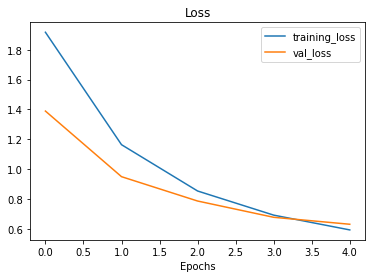

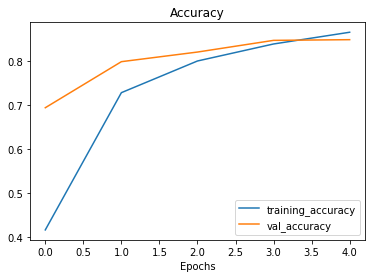

In [ ]:
hf.plot_loss_curves(history_0)

#### Globally average polling 2d layer
- the mathmatics can be performed in multiple axxis at a time.  
- aggregate the all data into one on the multiple specified axises


In [ ]:
input_shape = (1,4,4,3)
tf.random.set_seed(42)
data = tf.random.normal(input_shape)
output = tf.keras.layers.GlobalAveragePooling2D()(data)
print(output.shape)
print(output)

(1, 3)
tf.Tensor([[-0.09368646 -0.45840448 -0.2885598 ]], shape=(1, 3), dtype=float32)


In [ ]:
# the mathmatics can be performed in multiple axxis at a time.  
# the axis also can be the key that you want to use to groupby
tf.math.reduce_mean(data,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

### Modeling - Model_1 
- Data Profile:
  - 1% of training food vision data
  - data with augmentation
- Model Description:
  - feature_extraction transfer learning
- reference:
  - https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing


In [ ]:
hf.walk_through_dir("./10_food_classes_1_percent")

There are 2 directories and 0 images in './10_food_classes_1_percent'.
There are 10 directories and 0 images in './10_food_classes_1_percent/test'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in './10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in './10_food_classes_1

#### Proprocessing using Sequential
- when apply the preprocessing, need to specify
  - training=True that is only applied to the training dataset and perform during the training
  - can save the preprocessing pipeline like NN model
    - because it is build using Sequential as well

In [ ]:
train_dir = "./10_food_classes_1_percent/train"
test_dir = "./10_food_classes_1_percent/test"

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE,
                                                         batch_size=BATCH_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE,
                                                         batch_size=BATCH_SIZE)

# how to use image_dataset_from_directory to do the data augmentation  
# using the layers to do the image augmentation using Sequential API
# also liike the feature engineering pipeline on the traininig images
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential(layers=[
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2),
  layers.experimental.preprocessing.RandomHeight(0.2),
  layers.experimental.preprocessing.RandomWidth(0.2),
],name = "data_augmentation")


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


(-0.5, 383.5, 511.5, -0.5)

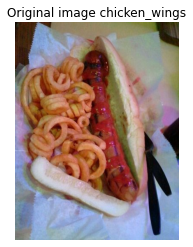

In [ ]:
# view the data
choice = random.choice(train_data.class_names)
target_dir = f"./10_food_classes_1_percent/train/{choice}"
random_image = target_dir + "/"+ random.choice(os.listdir(target_dir))
image = mpimg.imread(random_image)
plt.imshow(image)
plt.title(f"Original image {choice}")
plt.axis(False)

Text(0.5, 1.0, 'Augmented image: ramen')

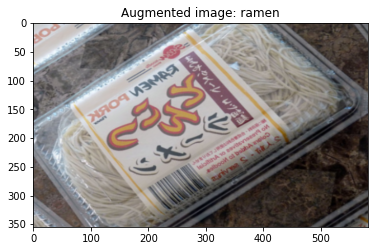

In [ ]:
augmented_image = data_augmentation(image,training=True) / 255.
plt.imshow(augmented_image)
plt.title(f"Augmented image: {choice}")

#### Modeling 

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))

x = data_augmentation(inputs, training = True)

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

# combination of sequential and functional
model_1 = tf.keras.Model(inputs,outputs)

model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = 0.25 * len(test_data),
            callbacks = [hf.create_tensorboard_callback("transfer_learning",
                                                        "1_percent_data_aug_feature_extraction")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug_feature_extraction/20220627-152757
Epoch 1/5
3/3 [==============================] - 11s 2s/step - loss: 2.3648 - accuracy: 0.0857 - val_loss: 2.2222 - val_accuracy: 0.1781
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1219 - accuracy: 0.2714 - val_loss: 2.1038 - val_accuracy: 0.2516
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9502 - accuracy: 0.3429 - val_loss: 2.0317 - val_accuracy: 0.3094
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7248 - accuracy: 0.6429 - val_loss: 1.9537 - val_accuracy: 0.3391
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6666 - accuracy: 0.5714 - val_loss: 1.8685 - val_accuracy: 0.3938


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 21s 261ms/step - loss: 1.8933 - accuracy: 0.3732


[1.8932610750198364, 0.373199999332428]

In [ ]:
model_1.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_12  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-train

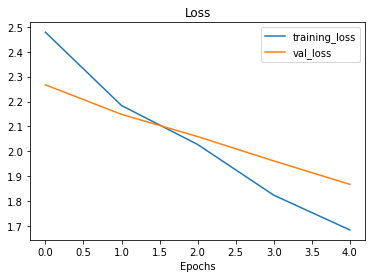

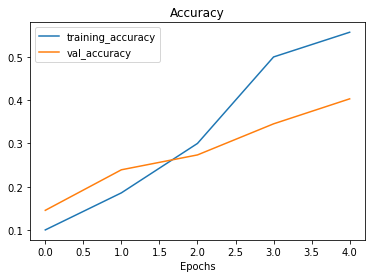

In [ ]:
hf.plot_loss_curves(history_1)

### Modeling - Model_2
- Data Profile
  - 10% of training food vision data
  - data with augmentation
- Model Description:
  - use the based line model still
  - feature extraction transfer learning
- Reference:
  - https://keras.io/guides/transfer_learning/#build-a-model

#### Model Checkpoint
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
- can save model or just save model's weights
  - can be used a flow in the version control of model
  - won't save the layer trainable prop.

In [ ]:
# in this case, the checkpoint file will be overwritten till the end of epochs.
checkpoint_filepath = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True, # only save model's weights
    monitor='val_accuracy',
    mode='max',
    save_best_only=False,
    save_freq="epoch",
    verbose = 1)

In [ ]:
train_dir = "./10_food_classes_10_percent/train"
test_dir = "./10_food_classes_10_percent/test"

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE,
                                                         batch_size=BATCH_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE,
                                                         batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))

x = data_augmentation(inputs, training = True)

# https://keras.io/guides/transfer_learning/#build-a-model
# because the layers in the base model is using the batch normalization. 
# so define the training = False, that means the parameter used in batch normalization won't be change during training
# will only keep all incoming data in reference mode.
x = base_model(x,training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(10,activation="softmax")(x)

# combination of sequential and functional
model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps = 0.25 * len(test_data),
            callbacks = [hf.create_tensorboard_callback("transfer_learning",
                                                        "10_percent_data_aug_feature_extraction"),
                         checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20220627-134126
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.1144 - accuracy: 0.2387
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 17s 454ms/step - loss: 2.1144 - accuracy: 0.2387 - val_loss: 1.6730 - val_accuracy: 0.5250
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4144 - accuracy: 0.6387
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 7s 296ms/step - loss: 1.4144 - accuracy: 0.6387 - val_loss: 1.2683 - val_accuracy: 0.6859
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0956 - accuracy: 0.7280
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 367ms/step - loss: 1.0956 - accuracy: 0.7280 - val_loss: 1.0601 - val_accuracy: 0.7297
Epo

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 12s 142ms/step - loss: 0.8426 - accuracy: 0.7608


[0.8426191210746765, 0.7608000040054321]

In [ ]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, None)  0        
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_8   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

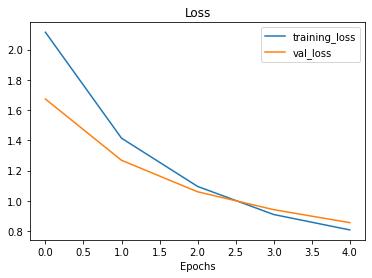

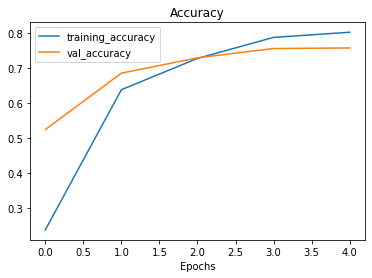

In [ ]:
hf.plot_loss_curves(history_2)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 0.8267 - accuracy: 0.7728


[0.8267332315444946, 0.7728000283241272]

In [ ]:
model_2.load_weights(checkpoint_filepath) # only load weights.
model_2.evaluate(test_data)

79/79 [==============================] - 12s 143ms/step - loss: 0.8421 - accuracy: 0.7656


[0.8420583009719849, 0.7656000256538391]

In [ ]:
model_2.load_weights(checkpoint_filepath)

In [ ]:
for index,layer in enumerate(model_2.layers[2].layers):
  print(index,layer.name,layer.trainable)

0 input_24 False
1 rescaling_12 False
2 normalization_12 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_re

In [ ]:
len(model_2.layers[2].trainable_variables)

0

## 2022.06.27 - Transfer Learning Part 2

### Modeling - Model 3 
- Data Profile
  - 10% of training food vision data
  - data with augmentation
- Model Description:
  - fine-tuning Model
    - can change trainable setting on the some layers of composite layers.
    - like make some sub-layers as trainable = True in a huge layer.
    - usually learn the last layers because the first layers is important layer that extract the important feature
  - Learniing rate:
    - usually we use the lower learning rate because the pattern has been pre-learned on the pre-trained model
  - model and layers relatioonship
    - the model is a composite of layers
    - trainable_variables include the weights and weights
  

In [ ]:
# all layers default is trainable first then only keep last 10 years is trainable
base_model.trainable = True # can trainable on no-params hidden layer like pooling or smth else.

# trainable for last 10 layers
for layers in base_model.layers[:-10]:
  layers.trainable = False # can be model.trainable or layers.trainable. Because the model is composite of layers

# model change so need to re-compile
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                # because model_2 is learning already, so no need too much lrrate to learn again
                optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-4), 
                metrics = ["accuracy"])


In [ ]:
for index,layers in enumerate(model_2.layers[2].layers[-20:]):
  print(index,layers.name,layers.trainable,len(layers.trainable_variables))

0 block6d_project_conv False 0
1 block6d_project_bn False 0
2 block6d_drop False 0
3 block6d_add False 0
4 block7a_expand_conv False 0
5 block7a_expand_bn False 0
6 block7a_expand_activation False 0
7 block7a_dwconv False 0
8 block7a_bn False 0
9 block7a_activation False 0
10 block7a_se_squeeze True 0
11 block7a_se_reshape True 0
12 block7a_se_reduce True 2
13 block7a_se_expand True 2
14 block7a_se_excite True 0
15 block7a_project_conv True 1
16 block7a_project_bn True 2
17 top_conv True 1
18 top_bn True 2
19 top_activation True 0


In [ ]:
len(base_model.trainable_variables),len(model_2.trainable_variables)

(10, 12)

In [ ]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, None)  0        
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_9   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [ ]:
# so we keep first 5 epoch for model_2_feature_extractioin, and use the fine-tune modoel to fit the data for last 5 epochs.
fine_tune_epochs = 10
history_3 = model_2.fit(train_data,
            epochs = fine_tune_epochs, # this is not the delta, this is the total epochs you want to run
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = 0.25 * len(test_data),
            # usually used to retrain the model without breaking previous loss/metrics calculation during previous epochs
            initial_epoch = history_2.epoch[-1], # start to fit since this ?th epoch (index is stated from zero)
            callbacks = [hf.create_tensorboard_callback("transfer_learning",
                                                        "10_percent_data_aug_fine_tuning_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug_fine_tuning_last_10/20220627-142246
Epoch 5/10
24/24 [==============================] - 9s 349ms/step - loss: 0.3444 - accuracy: 0.9000 - val_loss: 0.4775 - val_accuracy: 0.8391
Epoch 6/10
24/24 [==============================] - 10s 390ms/step - loss: 0.3145 - accuracy: 0.9120 - val_loss: 0.4648 - val_accuracy: 0.8500
Epoch 7/10
24/24 [==============================] - 6s 248ms/step - loss: 0.2683 - accuracy: 0.9227 - val_loss: 0.5024 - val_accuracy: 0.8156
Epoch 8/10
24/24 [==============================] - 9s 371ms/step - loss: 0.2561 - accuracy: 0.9267 - val_loss: 0.4863 - val_accuracy: 0.8328
Epoch 9/10
24/24 [==============================] - 7s 271ms/step - loss: 0.2353 - accuracy: 0.9347 - val_loss: 0.5365 - val_accuracy: 0.8141
Epoch 10/10
24/24 [==============================] - 6s 251ms/step - loss: 0.2088 - accuracy: 0.9520 - val_loss: 0.5050 - val_accuracy: 0.8234


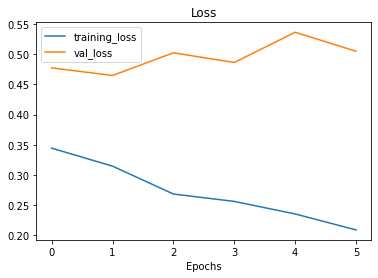

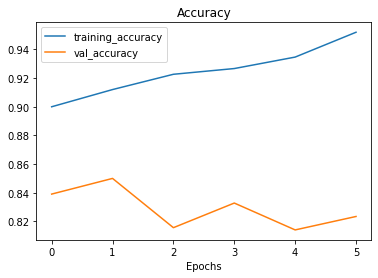

In [ ]:
hf.plot_loss_curves(history_3)

In [ ]:
history_2.history["accuracy"]

[0.23866666853427887,
 0.6386666893959045,
 0.7279999852180481,
 0.7879999876022339,
 0.8026666641235352]

In [ ]:
def compare_history(original_hist,new_hist,initial_epochs=5):
  total_loss = original_hist.history["loss"] + new_hist.history["loss"]
  total_val_loss = original_hist.history["val_loss"] + new_hist.history["val_loss"]
  total_acc = original_hist.history["accuracy"] + new_hist.history["accuracy"]
  total_val_acc = original_hist.history["val_accuracy"] + new_hist.history["val_accuracy"]

  plt.figure(figsize=(12,9))
  plt.subplot(2,1,1)
  plt.plot(total_loss,label = "training_loss")
  plt.plot(total_val_loss,label = "validation_loss")
  #plt.axvline(initial_epochs-1,label="Start Fine tuning",c="green")
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start_fine_tuning")
  plt.title("Training and Validation loss")
  plt.legend(loc = "upper right")

  plt.subplot(2,1,2)
  plt.plot(total_acc,label = "training_acc")
  plt.plot(total_val_acc,label = "validation_acc")
  #plt.axvline(initial_epochs-1,label="Start Fine tuning",c="green")
  #plt.ylim() => (0.0,1.0) => and y-axis usually be < 1 after training.
  plt.plot([initial_epochs-1,initial_epochs-1],plt.ylim(),label="Start_fine_tuning")
  plt.title("Training and Validation acc")
  plt.legend(loc = "lower right")

(0.0, 1.0)

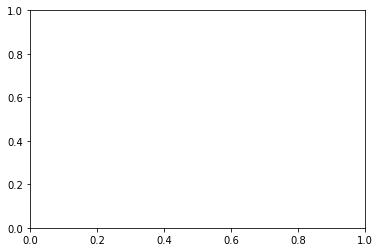

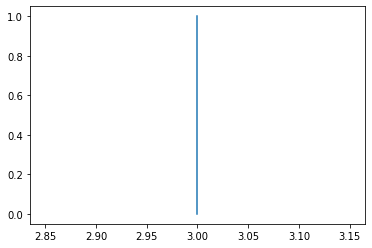

In [ ]:
plt.plot([3,3],plt.ylim())

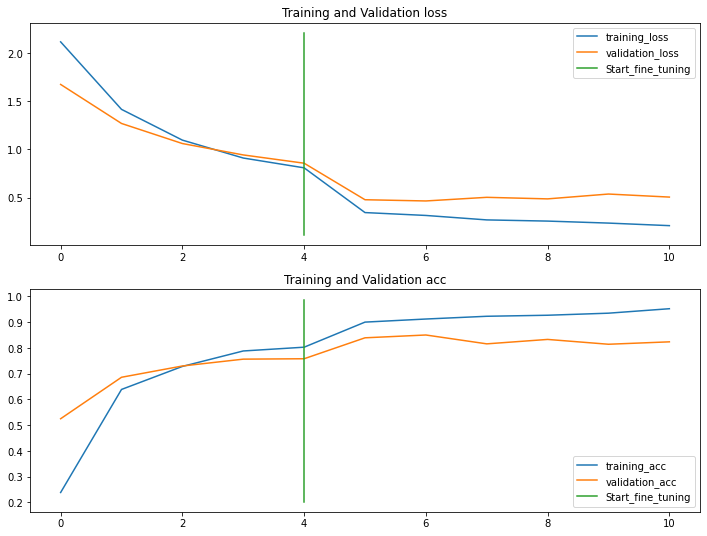

In [ ]:
compare_history(history_2,history_3)

### Modeling 4 
- Data Profile
  - 100% of training food vision data
  - Data with Augmentation
- Model Description
  - bassed model with fine tuning on the last 10 layers

In [ ]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

hf.walk_through_dir(train_dir)
hf.walk_through_dir(test_dir)

There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_cla

In [ ]:
# prepare model 
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         batch_size=BATCH_SIZE,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                         batch_size=BATCH_SIZE,
                                                         label_mode="categorical",
                                                         image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 115ms/step - loss: 0.5188 - accuracy: 0.8312


[0.5188275575637817, 0.8312000036239624]

In [ ]:
# revert the model back to the weights 'before' fitting the dataset using fine-tuneing transfer leraning
model_2.load_weights(checkpoint_filepath)

In [ ]:
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics = ["accuracy"])

history_4 = model_2.fit(train_data,
            initial_epoch = history_2.epoch[-1],
            epochs = 10,
            validation_data = test_data,
            validation_steps = 0.25 * len(test_data),
            callbacks = [hf.create_tensorboard_callback("transfer_learning",
                                                        "100_percent_data_aug_fine_tuning_last_10")])

Saving TensorBoard log files to: transfer_learning/100_percent_data_aug_fine_tuning_last_10/20220627-151858
Epoch 5/10
235/235 [==============================] - 39s 139ms/step - loss: 0.5303 - accuracy: 0.8291 - val_loss: 0.4688 - val_accuracy: 0.8391
Epoch 6/10
235/235 [==============================] - 30s 124ms/step - loss: 0.4811 - accuracy: 0.8437 - val_loss: 0.4622 - val_accuracy: 0.8422
Epoch 7/10
235/235 [==============================] - 28s 119ms/step - loss: 0.4384 - accuracy: 0.8607 - val_loss: 0.3873 - val_accuracy: 0.8578
Epoch 8/10
235/235 [==============================] - 28s 118ms/step - loss: 0.4055 - accuracy: 0.8692 - val_loss: 0.4252 - val_accuracy: 0.8547
Epoch 9/10
235/235 [==============================] - 28s 116ms/step - loss: 0.3770 - accuracy: 0.8760 - val_loss: 0.4314 - val_accuracy: 0.8516
Epoch 10/10
235/235 [==============================] - 27s 111ms/step - loss: 0.3575 - accuracy: 0.8849 - val_loss: 0.3756 - val_accuracy: 0.8734


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 111ms/step - loss: 0.3970 - accuracy: 0.8720


[0.3969767093658447, 0.871999979019165]

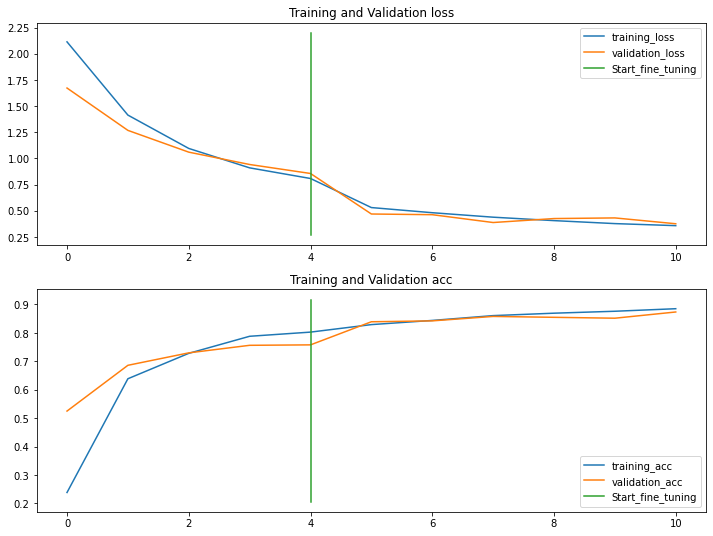

In [ ]:
compare_history(history_2,history_4)

In [ ]:
!tensorboard dev upload \
--logdir "./transfer_learning" \
--name "transfer_learning" \
--description "model experiments with food 101 datasets" \
--one_shot # finish the cell execution once it finished uploaded


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=ch29YuYoVHM0ZGRUBYRk2OLnC6tpqg&prompt=consent&access_type=o

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/DVGkwbdaS0aSkF5k6o0mtw/
	Name                 transfer_learning
	Description          model experiments with food 101 datasets
	Id                   DVGkwbdaS0aSkF5k6o0mtw
	Created              2022-06-27 15:31:45 (11 minutes ago)
	Updated              2022-06-27 15:32:00 (10 minutes ago)
	Runs                 22
	Tags                 5
	Scalars              324
	Tensor bytes         0
	Binary object bytes  9598346
https://tensorboard.dev/experiment/5HeDPQwUQoec0Nb0vip9qg/
	Name                 exercise
	Description          exe
	Id                   5HeDPQwUQoec0Nb0vip9qg
	Created              2022-06-25 12:55:07
	Updated              2022-06-25 12:55:09
	Runs                 4
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  8151421
https://tensorboard.dev/experiment/AKfdJv6aQ4CWNpKflLiNGw/
	Name                 EfficientnetB0 vs resnet50v2
	Description          Comparing the model performance using two 

In [ ]:
!tensorboard dev delete  --experiment_id "5HeDPQwUQoec0Nb0vip9qg"

Deleted experiment 5HeDPQwUQoec0Nb0vip9qg.


### Exercise

In [ ]:
train_dir = "/content/10_food_classes_10_percent/train"
test_dir = "/content/10_food_classes_10_percent/test"

from tensorflow.keras.utils import image_dataset_from_directory 
train_data = image_dataset_from_directory(train_dir,
                                          image_size=(224,224),
                                          batch_size=32,
                                          label_mode="categorical")
test_data = image_dataset_from_directory(test_dir,
                                          image_size=(224,224),
                                          batch_size=32,
                                          label_mode="categorical")


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = (224,224,3))
x = base_model(inputs,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10,activation="softmax")(x)
model_0 = tf.keras.Model(inputs,outputs)
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


In [ ]:
ckpt_filepath = "./ten_percent_model_checkpoints_weights/{epoch:02d}-{val_accuracy:.2f}"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False, verbose = 1) # save model for each epoch

In [ ]:
history_0 = model_0.fit(train_data,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = 0.25 * len(test_data),
           epochs = 10,
           callbacks = [checkpoint_callback,
                        hf.create_tensorboard_callback("transfer_learning_exercise",
                                                       "10_percent_data_feature_extraction")])

Saving TensorBoard log files to: transfer_learning_exercise/10_percent_data_feature_extraction/20220627-160648
Epoch 1/10
23/24 [===========================>..] - ETA: 0s - loss: 1.9954 - accuracy: 0.3628
Epoch 1: saving model to ./ten_percent_model_checkpoints_weights/01-0.69
24/24 [==============================] - 15s 258ms/step - loss: 1.9881 - accuracy: 0.3653 - val_loss: 1.4111 - val_accuracy: 0.6891
Epoch 2/10
23/24 [===========================>..] - ETA: 0s - loss: 1.1640 - accuracy: 0.7296
Epoch 2: saving model to ./ten_percent_model_checkpoints_weights/02-0.79
24/24 [==============================] - 5s 200ms/step - loss: 1.1579 - accuracy: 0.7320 - val_loss: 0.9369 - val_accuracy: 0.7906
Epoch 3/10
23/24 [===========================>..] - ETA: 0s - loss: 0.8268 - accuracy: 0.8207
Epoch 3: saving model to ./ten_percent_model_checkpoints_weights/03-0.83
24/24 [==============================] - 5s 200ms/step - loss: 0.8259 - accuracy: 0.8187 - val_loss: 0.7507 - val_accuracy: 0

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.4984 - accuracy: 0.8540


[0.49840018153190613, 0.8539999723434448]

In [ ]:
base_model.trainable = True
for la in model_0.layers[1].layers[:-20]:
  la.trainable = False

In [ ]:
#model_0.load_weights("./ten_percent_model_checkpoints_weights/10-0.85")

In [ ]:
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics = ["accuracy"])

history_1 = model_0.fit(train_data,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = 0.25 * len(test_data),
           epochs = 20,
           initial_epoch = 10,
           callbacks = [
                        hf.create_tensorboard_callback("transfer_learning_exercise",
                                                       "10_percent_data_fine_tuning_last_20")])


Saving TensorBoard log files to: transfer_learning_exercise/10_percent_data_fine_tuning_last_20/20220627-161701
Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9413
Epoch 11: saving model to ./ten_percent_model_checkpoints_weights/11-0.86
24/24 [==============================] - 11s 234ms/step - loss: 0.2619 - accuracy: 0.9413 - val_loss: 0.4239 - val_accuracy: 0.8594
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.1424 - accuracy: 0.9715
Epoch 12: saving model to ./ten_percent_model_checkpoints_weights/12-0.86
24/24 [==============================] - 5s 205ms/step - loss: 0.1415 - accuracy: 0.9707 - val_loss: 0.4148 - val_accuracy: 0.8578
Epoch 13/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0885 - accuracy: 0.9864
Epoch 13: saving model to ./ten_percent_model_checkpoints_weights/13-0.85
24/24 [==============================] - 5s 204ms/step - loss: 0.0880 - accuracy: 0.9867 - val_loss: 0.4384 - val_accu

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.5151 - accuracy: 0.8544


[0.5151377320289612, 0.8543999791145325]

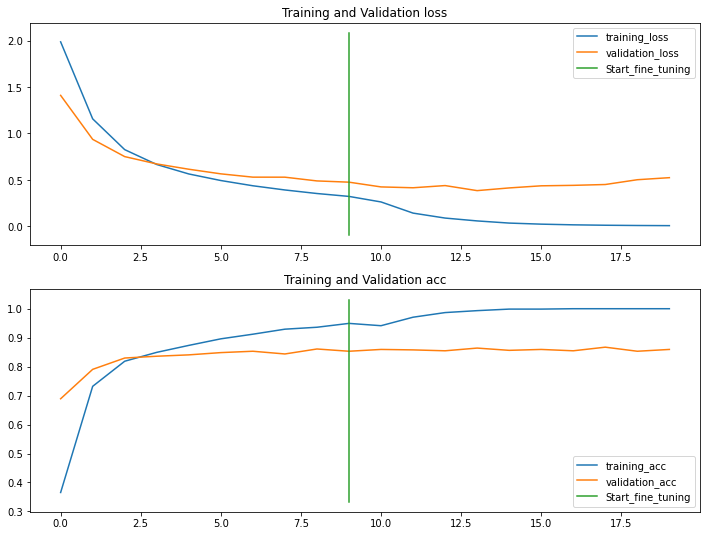

In [ ]:
compare_history(history_0,history_1,initial_epochs=10)

In [ ]:
base_model.trainable = True
for la in model_0.layers[1].layers[:-30]:
  la.trainable = False

In [ ]:
print(len(base_model.trainable_variables))

28


In [ ]:
#model_0.load_weights("./ten_percent_model_checkpoints_weights/10-0.85")

In [ ]:
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics = ["accuracy"])

history_2 = model_0.fit(train_data,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = 0.25 * len(test_data),
           epochs = 20,
           initial_epoch = 10,
           callbacks = [
                        hf.create_tensorboard_callback("transfer_learning_exercise",
                                                       "10_percent_data_fine_tuning_last_30")])


Saving TensorBoard log files to: transfer_learning_exercise/10_percent_data_fine_tuning_last_30/20220627-162301
Epoch 11/20
24/24 [==============================] - ETA: 0s - loss: 0.2592 - accuracy: 0.9387
Epoch 11: saving model to ./ten_percent_model_checkpoints_weights/11-0.85
24/24 [==============================] - 12s 266ms/step - loss: 0.2592 - accuracy: 0.9387 - val_loss: 0.4278 - val_accuracy: 0.8547
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 0.1356 - accuracy: 0.9715
Epoch 12: saving model to ./ten_percent_model_checkpoints_weights/12-0.88
24/24 [==============================] - 5s 182ms/step - loss: 0.1339 - accuracy: 0.9720 - val_loss: 0.3700 - val_accuracy: 0.8750
Epoch 13/20
23/24 [===========================>..] - ETA: 0s - loss: 0.0773 - accuracy: 0.9891
Epoch 13: saving model to ./ten_percent_model_checkpoints_weights/13-0.87
24/24 [==============================] - 5s 179ms/step - loss: 0.0761 - accuracy: 0.9893 - val_loss: 0.3943 - val_accu

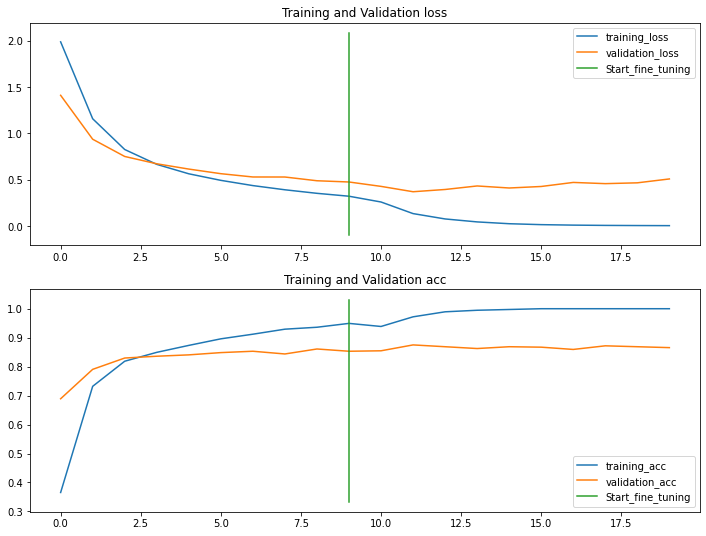

In [ ]:
compare_history(history_0,history_2,10)

In [ ]:
!tensorboard dev upload --logdir "./transfer_learning_exercise" --name "transfer_learning_exercise_2" --description "transfer_learning_exercise_dest_2" --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/1eqT0jrxTNSrAokrSaOr1A/

[2022-06-27T16:31:18] Started scanning logdir.
[2022-06-27T16:31:26] Total uploaded: 276 scalars, 0 tensors, 6 binary objects (4.5 MB)
[2022-06-27T16:31:26] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/1eqT0jrxTNSrAokrSaOr1A/


In [ ]:
test_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
def predict_plot_image(model,class_names):
  import random
  for images,labels in test_data.take(1):
    imgs = images
    labls = labels

  class_names = test_data.class_names
  choice = random.choice(range(len(imgs)))
  random_image = images[choice]/255.
  actual_label = class_names[np.argmax(labls[choice])]
  ind_argmax = tf.argmax(model_0.predict(tf.expand_dims(random_image,axis=0)),axis=1)
  predict_label = class_names[tf.squeeze(ind_argmax)]
  color = "red" if actual_label != predict_label else "green"

  plt.figure(figsize=(12,9))
  plt.imshow(random_image)
  plt.title(f"Predicted Label {predict_label}; Actual Label: {actual_label}",c=color)
  plt.axis(False)

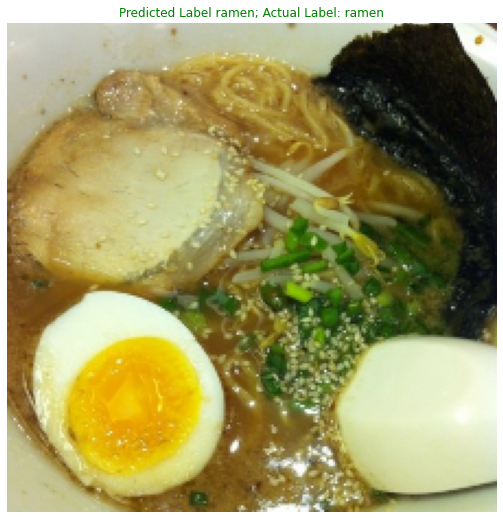

In [ ]:
predict_plot_image(model_0,class_names = test_data.class_names)

In [6]:
### Exercise

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         label_mode="categorical",
                                                         image_size=(224,224),
                                                         batch_size=32,
                                                         shuffle=True,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode="categorical",
                                                        image_size=(224,224),
                                                        batch_size=32,
                                                        shuffle=False)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [11]:
class_names = train_data.class_names

In [25]:
data_aug_model = tf.keras.Sequential([
      tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
      tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
      tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
      tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
      tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
],name="data_augmentation")

In [23]:
train_data.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [39]:
# cancel the full-connected layer and efficientnet will help us do the preprocessing so no need to rescale
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

# need to define it is not trainable
base_model.trainable = False

# functional api
inputs = tf.keras.layers.Input(shape=(224,224,3))
x = data_aug_model(inputs,training=True) # only apply preprocessing on the x
x = base_model(x,training=False) # reason because don't do batch normalizationn in the inference purpose
x = tf.keras.layers.GlobalAveragePooling2D(name="globally_average_pooling_2")(x)
outputs = tf.keras.layers.Dense(len(class_names),activation="softmax")(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(
    "./ckpt/10_percent",
    save_weights_only=True,
    save_best_only=True,
)

In [40]:
history_0 = model_0.fit(
    train_data,
    steps_per_epoch = len(train_data),
    epochs = 5,
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    callbacks = [modelcheckpoint]
)

Epoch 1/5
24/24 [==============================] - 17s 467ms/step - loss: 1.9606 - accuracy: 0.3573 - val_loss: 1.6826 - val_accuracy: 0.4918
Epoch 2/5
24/24 [==============================] - 9s 350ms/step - loss: 1.3469 - accuracy: 0.6467 - val_loss: 1.2740 - val_accuracy: 0.6398
Epoch 3/5
24/24 [==============================] - 10s 420ms/step - loss: 1.0443 - accuracy: 0.7560 - val_loss: 1.1223 - val_accuracy: 0.6776
Epoch 4/5
24/24 [==============================] - 9s 365ms/step - loss: 0.9078 - accuracy: 0.7587 - val_loss: 0.9762 - val_accuracy: 0.7352
Epoch 5/5
24/24 [==============================] - 10s 397ms/step - loss: 0.7929 - accuracy: 0.8013 - val_loss: 0.9481 - val_accuracy: 0.7188


In [41]:
model_0.evaluate(test_data)

79/79 [==============================] - 16s 196ms/step - loss: 0.8560 - accuracy: 0.7580


[0.8559967875480652, 0.7580000162124634]

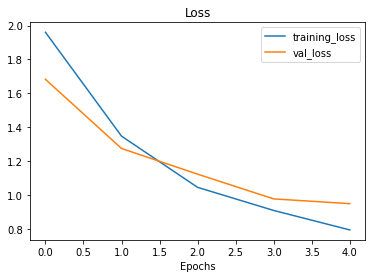

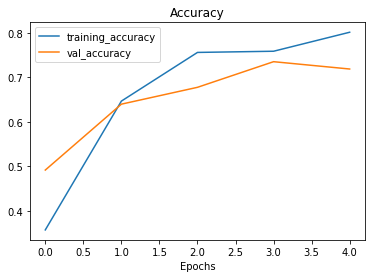

In [42]:
hf.plot_loss_curves(history_0)

In [43]:
model_2 = tf.keras.models.clone_model(model_0)
model_2.load_weights("./ckpt/10_percent")

In [ ]:
# fine tuning for top 10 layers. and compare history

In [44]:
model_0.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 globally_average_pooling_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [48]:
base_model.trainable = True
for la in base_model.layers[:-10]:
  la.trainable = False

In [55]:
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(1e-4),
                metrics = ["accuracy"])

In [57]:
history_1 = model_0.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    initial_epoch = 4 # start from index 4
)

Epoch 5/10
24/24 [==============================] - 16s 442ms/step - loss: 0.7099 - accuracy: 0.7880 - val_loss: 0.7945 - val_accuracy: 0.7336
Epoch 6/10
24/24 [==============================] - 10s 388ms/step - loss: 0.5405 - accuracy: 0.8453 - val_loss: 0.7589 - val_accuracy: 0.7484
Epoch 7/10
24/24 [==============================] - 9s 372ms/step - loss: 0.5394 - accuracy: 0.8333 - val_loss: 0.6892 - val_accuracy: 0.7730
Epoch 8/10
24/24 [==============================] - 9s 383ms/step - loss: 0.4683 - accuracy: 0.8547 - val_loss: 0.7415 - val_accuracy: 0.7484
Epoch 9/10
24/24 [==============================] - 10s 375ms/step - loss: 0.4182 - accuracy: 0.8720 - val_loss: 0.7771 - val_accuracy: 0.7451
Epoch 10/10
24/24 [==============================] - 9s 372ms/step - loss: 0.3947 - accuracy: 0.8840 - val_loss: 0.6712 - val_accuracy: 0.7566


In [58]:
model_0.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 0.6569 - accuracy: 0.7812


[0.65688157081604, 0.7811999917030334]

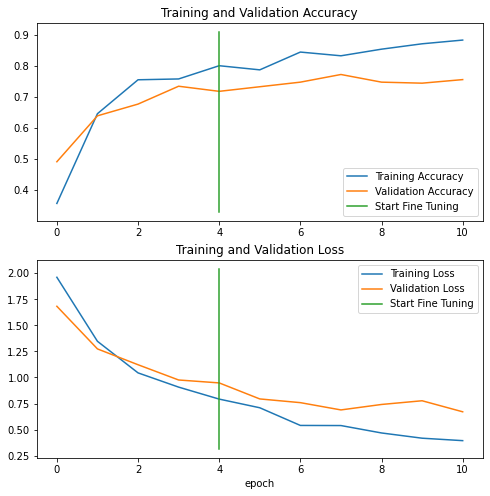

In [60]:
hf.compare_historys(history_0,history_1)

In [63]:
### Exercise for 100% data with fine tuning

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         label_mode="categorical",
                                                         image_size=(224,224),
                                                         batch_size=32,
                                                         shuffle=True,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                        label_mode="categorical",
                                                        image_size=(224,224),
                                                        batch_size=32,
                                                        shuffle=False)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [67]:
model_2.layers[2].trainable = True

for l in model_2.layers[2].layers[:-20]:
  l.trainable=False

model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(1e-4),
                metrics = ["accuracy"])

In [68]:
history_2 = model_2.fit(
    train_data,
    epochs = 10,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = int(0.25*len(test_data)),
    initial_epoch = 4 # start from index 4
)

Epoch 5/10
235/235 [==============================] - 53s 197ms/step - loss: 0.9497 - accuracy: 0.6920 - val_loss: 0.7495 - val_accuracy: 0.7451
Epoch 6/10
235/235 [==============================] - 41s 172ms/step - loss: 0.7368 - accuracy: 0.7585 - val_loss: 0.5452 - val_accuracy: 0.8273
Epoch 7/10
235/235 [==============================] - 37s 153ms/step - loss: 0.6527 - accuracy: 0.7885 - val_loss: 0.5955 - val_accuracy: 0.7977
Epoch 8/10
235/235 [==============================] - 36s 153ms/step - loss: 0.5882 - accuracy: 0.8065 - val_loss: 0.5398 - val_accuracy: 0.8257
Epoch 9/10
235/235 [==============================] - 38s 158ms/step - loss: 0.5445 - accuracy: 0.8221 - val_loss: 0.5511 - val_accuracy: 0.8240
Epoch 10/10
235/235 [==============================] - 36s 152ms/step - loss: 0.5014 - accuracy: 0.8393 - val_loss: 0.5483 - val_accuracy: 0.8158


In [69]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 141ms/step - loss: 0.5262 - accuracy: 0.8324


[0.5262179374694824, 0.8324000239372253]

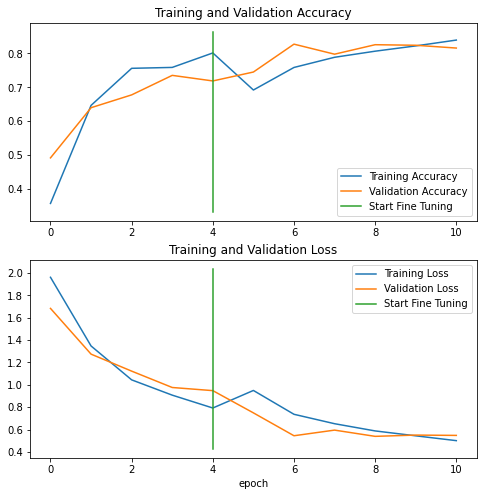

In [70]:
hf.compare_historys(history_0,history_2)